In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(folder_name, training_run):
    performance_over_time = np.loadtxt(folder_name+'/training_run_'+str(training_run)+'_performance.csv', delimiter=',')
    test_sets_used = np.loadtxt(folder_name+'/training_run_'+str(training_run)+'_test_sets_used.csv', delimiter=',')
    mutation_ranges = np.loadtxt(folder_name+'/training_run_'+str(training_run)+'_mutation_ranges.csv', delimiter=',')
    config_array = np.load(folder_name+'/training_run_'+str(training_run)+'_config.npy', allow_pickle=True)
    config = config_array.item()
    return performance_over_time, test_sets_used, mutation_ranges, config


def array_to_dict(array):
    print(array)
    return {key: value for key, value in array}


In [3]:
class Run:
    def __init__(self,performance_over_time, test_sets_used, mutation_ranges, config):
        self.performances = performance_over_time
        self.test_sets = test_sets_used
        self.mutation_ranges = mutation_ranges
        self.config = config

In [4]:
runs = []

failed_counter=0
for i in range(4,10):
    training_runs = 200
    for training_run in range(training_runs):
        try:
            folder_name = 'text_logs_'+str(i)+'/run_' + str(training_run)
            performance_over_time, test_sets_used, mutation_ranges, config = load_data(folder_name, training_run)
            runs.append(Run(performance_over_time, test_sets_used, mutation_ranges, config))
        except:
            failed_counter+=1
    
    print(failed_counter)


158
301
453
610
771
926


In [5]:
def compare_configs(conf1, conf2):
    for key in conf1.keys():
        if conf1[key] != conf2[key]:
            return False
    return True


groups = []
for run in runs:
    found = False
    for group in groups:
        if compare_configs(run.config, group[0].config):
            group.append(run)
            found = True
    if not found:
        new_group = [run]
        groups.append(new_group)
        
for i in groups:
    if len(i)!=1:
        print(len(i))

print(len(groups))

274


In [6]:
print(runs[1].performances.shape)

(1001, 15)


In [7]:
sorted_runs = sorted(runs, key=lambda x: np.max(x.performances), reverse=True)


# Sort the runs based on max performance
sorted_runs = sorted(runs, key=lambda x: np.max(x.performances), reverse=True)

performers = []

# Print details for the top 10 runs
for run in sorted_runs:
    max_perf = np.max(run.performances)
    
    config_details = {key: run.config[key] for key in [
        "neuron_count", 
        "n_survivors", 
        "connection_probability_dropoff", 
        "inference_steps", 
        "activation_function"]
    }
    print(f"Max Performance: {max_perf}")
    for key in config_details.keys():
        print(key,":",config_details[key])
    print()



Max Performance: 0.509
neuron_count : 243
n_survivors : 4
connection_probability_dropoff : 4.0
inference_steps : 13
activation_function : leaky_relu

Max Performance: 0.495
neuron_count : 448
n_survivors : 6
connection_probability_dropoff : 3.25
inference_steps : 10
activation_function : leaky_relu

Max Performance: 0.491
neuron_count : 448
n_survivors : 9
connection_probability_dropoff : 3.25
inference_steps : 6
activation_function : relu

Max Performance: 0.486
neuron_count : 1106
n_survivors : 12
connection_probability_dropoff : 4.0
inference_steps : 6
activation_function : relu

Max Performance: 0.466
neuron_count : 1574
n_survivors : 12
connection_probability_dropoff : 2.5
inference_steps : 6
activation_function : relu

Max Performance: 0.463
neuron_count : 243
n_survivors : 6
connection_probability_dropoff : 4.0
inference_steps : 13
activation_function : relu

Max Performance: 0.459
neuron_count : 733
n_survivors : 9
connection_probability_dropoff : 3.25
inference_steps : 13
acti

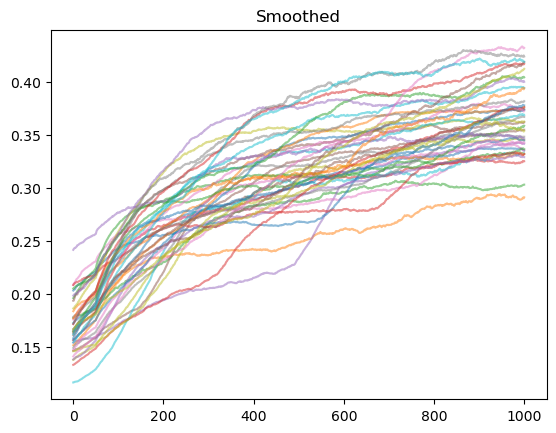

In [8]:
num_displayed = 40
num_points = 1001

# Smoothed Plot with updated data structure
def smooth_curve(points, smoothing_factor=50):
    smoothed_points = []
    for i in range(len(points)):
        start = max(0, i - smoothing_factor)
        end = min(len(points), i + smoothing_factor)
        smoothed_points.append(np.mean(points[start:end]))
    return np.array(smoothed_points)

for i in range(num_displayed):
    avg_performance = np.average(sorted_runs[num_displayed-i-1].performances, axis=1)
    smoothed_performance = smooth_curve(avg_performance)
    plt.plot(smoothed_performance, alpha=0.5)

plt.title("Smoothed")
plt.show()


|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

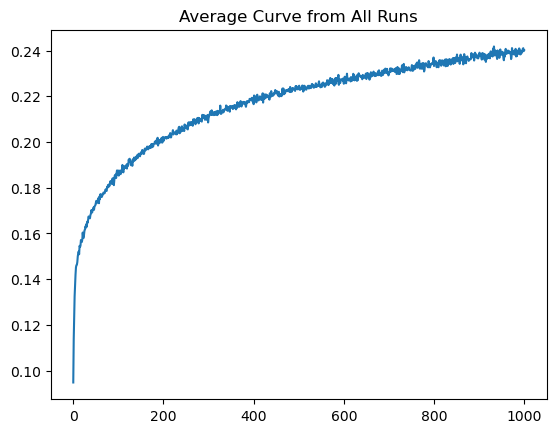

In [9]:
# Initialize an array to store the summed average performances
total_runs = len(sorted_runs)
summed_avg_performances = np.zeros(runs[0].performances.shape)

# Sum up all the average performances
for run in sorted_runs:
    try:
        avg_performance = run.performances
        summed_avg_performances += avg_performance
        print("|", end ="")
    except:
        pass

# Calculate the average curve
average_performance = summed_avg_performances / total_runs

# Plot the average curve
plt.plot(np.average(average_performance, axis=1))
plt.title("Average Curve from All Runs")
plt.show()


In [10]:
list_of_runs = runs



/Users/hannes/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


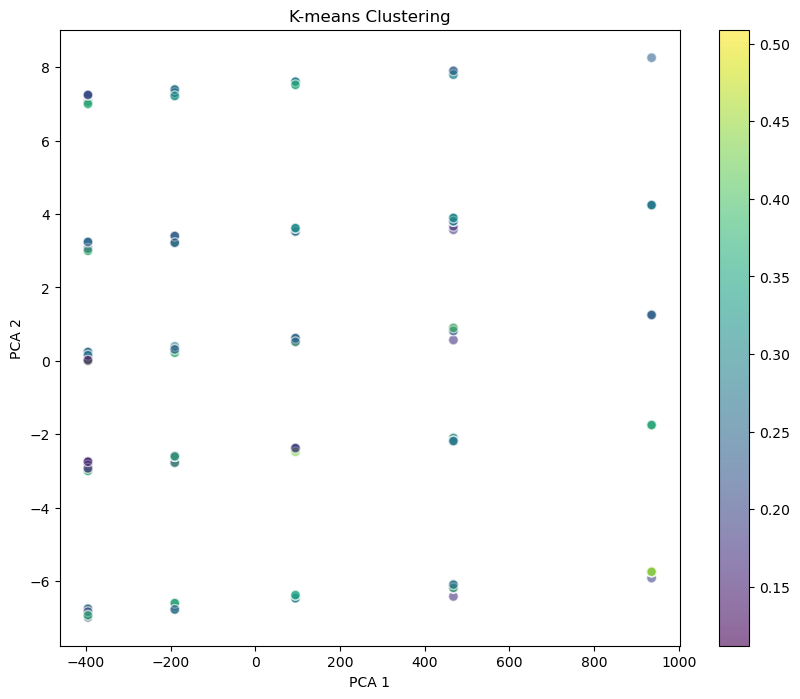

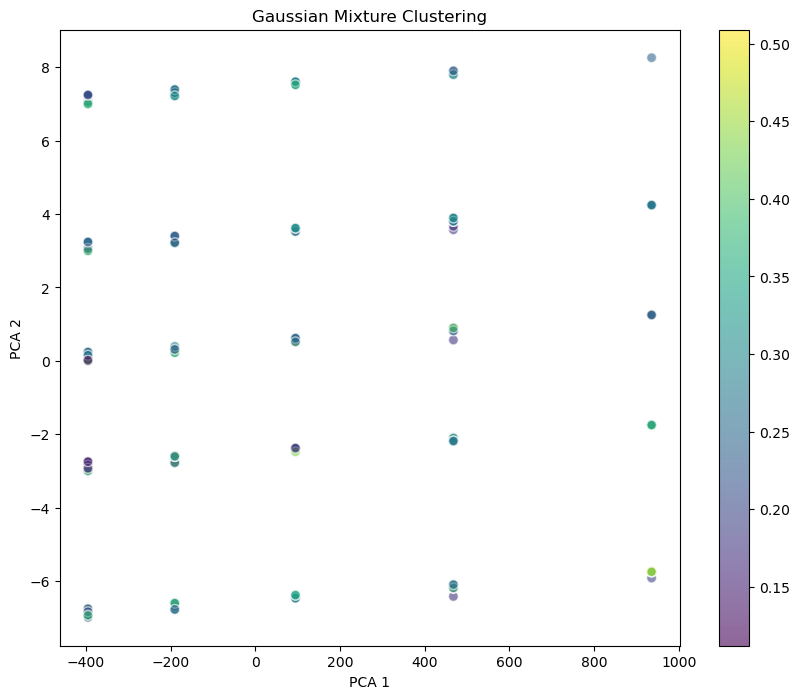

In [11]:
# Importing required libraries for clustering and PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Prepare the data for clustering and PCA
data_for_clustering = []
max_performance = []

for run in list_of_runs:
    config = run.config
    features = [
        config['neuron_count'],
        config['n_survivors'],
        config['connection_probability_dropoff'],
        config['inference_steps'],
        1 if config['activation_function'] == 'relu' else 0
    ]
    data_for_clustering.append(features)
    max_performance.append(np.max(run.performances))

data_for_clustering = np.array(data_for_clustering)
max_performance = np.array(max_performance)

# Perform PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_for_clustering)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # Just a guess for the number of clusters, you might want to tune this
kmeans_labels = kmeans.fit_predict(data_for_clustering)

# Perform Gaussian Mixture clustering
gmm = GaussianMixture(n_components=3)  # Again, just a guess
gmm_labels = gmm.fit_predict(data_for_clustering)

# Function to plot PCA with clusters
def plot_pca_clusters(pca_data, labels, title, performance):
    plt.figure(figsize=(10, 8))
    sc = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=performance, cmap='viridis', s=50, alpha=0.6, edgecolors='w', label=labels)
    plt.colorbar(sc)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

# Plotting
plot_pca_clusters(data_pca, kmeans_labels, 'K-means Clustering', max_performance)
plot_pca_clusters(data_pca, gmm_labels, 'Gaussian Mixture Clustering', max_performance)


In [12]:
import re  # Regular expression library for string pattern matching

def read_config(file_path):
    # Initialize an empty dictionary to store the configuration data
    config_dict = {}
    
    # Read the file line by line
    with open(file_path, 'r') as f:
        for line in f:
            # Regular expression to match lines with configuration keys and values
            match = re.search(r'(\w+)\s*:\s*([\w.]+)', line)
            if match:
                key, value = match.groups()
                # Store only the attributes we're interested in
                if key in ['neuron_count', 'n_survivors', 'connection_probability_dropoff', 'inference_steps', 'activation_function']:
                    # Attempt to convert the value to a float or integer if possible
                    try:
                        value = int(value)
                    except ValueError:
                        try:
                            value = float(value)
                        except ValueError:
                            pass  # leave it as a string
                    # Store the key-value pair in the dictionary
                    config_dict[key] = value
    
    return config_dict

In [13]:
def extract_perf_from_txt(filename):
    perf = []
    lines = open(filename).readlines()
    for line in lines:
        if line[0]=="g" and len(line)>25:
            try:
                perf.append(float(line.split(":")[-1].replace(" ", "").replace("\n","")))
            except:
                pass
    return perf


In [16]:
import os

# Given function to extract performance from txt
def extract_perf_from_txt(filename):
    perf = []
    lines = open(filename).readlines()
    for line in lines:
        if line[0]=="g" and len(line)>25:
            try:
                perf.append(float(line.split(":")[-1].replace(" ", "").replace("\n","")))
            except:
                pass
    return perf

# Function to iterate through folders and files to create the list of objects

data_list = []
base_folder =""
# Iterate through folders "text_logs_3" to "text_logs_9"
for i in range(3, 10):
    folder_path = os.path.join(base_folder, f"text_logs_{i}")

    if not os.path.exists(folder_path):
        print(f"Skipping {folder_path}, not found.")
        continue

    # Iterate through files "log_x.txt" where x is between 0 and 99
    for j in range(100):
        file_name = f"log_{j}.txt"
        file_path = os.path.join(folder_path, file_name)

        if not os.path.exists(file_path):
            print(f"Skipping {file_path}, not found.")
            continue

        # Extract configuration and performance data
        config_data = read_config(file_path)
        perf_data = extract_perf_from_txt(file_path)

        # Combine the two into an object and append it to the list
        data_object = {"config": config_data, "performance": perf_data}
        data_list.append(data_object)





In [17]:
print(len(data_list))

700


In [20]:
import pickle
with open("data.pkl", 'wb') as f:
    pickle.dump(data_list, f)

In [24]:
def get_max_perf(run):
    return max(run["performance"])

leader = data_list[0]
highest = 0
for i in data_list:
    if max(i["performance"])>highest:
        highest = max(i["performance"])
        leader = i

In [26]:
print(max(leader["performance"]))

0.511


In [27]:
print(leader["config"])

{'neuron_count': 1106, 'connection_probability_dropoff': 2.5, 'inference_steps': 6, 'activation_function': 'relu', 'n_survivors': 4}


In [29]:
print(len(leader["performance"]))

630
